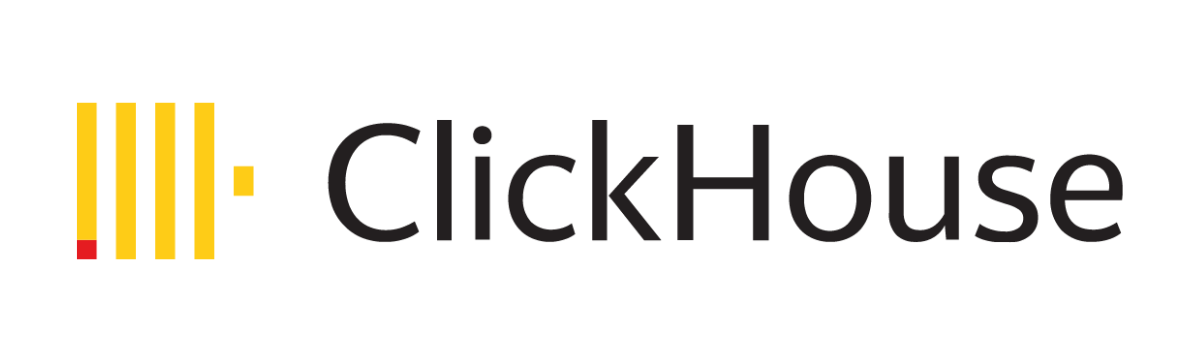

### Passo 1: Criar o serviço no ClickHouse Cloud

- Acesse https://clickhouse.cloud
- Faça login com sua conta.
- No painel principal, selecione “Create Service”.
- Escolha o tipo de ambiente, que pode ser Development ou Production.
- Escolha a região desejada.
- Confirme a criação do cluster.
- O serviço será provisionado em poucos segundos.

### Passo 2: Obter as credenciais de conexão

No painel do ClickHouse Cloud:
- Clique sobre o serviço criado.
- Vá na aba “Connect”.
- Em **Connect with:** selecine Python
- Clique em ver Password
- Copie o exemplo de conexão em Python
- Adicione a porta 8443 (port=8443)

### Passo 3: Instalar bibliotecas

In [16]:
#!pip install clickhouse-connect

### Passo 4: Criar Conexão em Python

In [ ]:
import clickhouse_connect

client = clickhouse_connect.get_client(
    host='ativ15davi.eastus2.aws.clickhouse.cloud',  
    port=8443,
    username='default',
    password='JMza9i~m4jUQN',
    secure=True
)

print("Result:", client.query("SELECT 1").result_set[0][0])

Result: 1


### Passo 5: Criar um banco de dados simples

In [2]:
client.command('CREATE DATABASE IF NOT EXISTS banco_sua_turma')
print("Banco criado com sucesso!")

Banco criado com sucesso!


### Passo 6: Criar uma tabela

In [3]:
client.command('''
CREATE TABLE IF NOT EXISTS banco_sua_turma.usuarios(
id UInt32,
nome String,
idade UInt8)
ENGINE = MergeTree()
ORDER BY id
''')
print("Tabela criada com sucesso!")

Tabela criada com sucesso!


### Passo 7: Inserir dados no ClickHouse por Python
Inserção de múltiplas linhas

In [4]:
dados = [
    (1, 'Ana', 25),
    (2, 'Bruno', 30),
    (3, 'Carla', 22)
]

In [5]:
client.insert('banco_sua_turma.usuarios',dados,column_names=['id', 'nome', 'idade'])
print('Multiplas linhas inseridas na tabela!')

Multiplas linhas inseridas na tabela!


##### Inserção linha por linha (não recomendado, mas possível)

In [6]:
client.insert('banco_sua_turma.usuarios',[(4, 'Daniel', 29)],column_names=['id', 'nome', 'idade'])
print('Nova linha inserida na tabela!')

Nova linha inserida na tabela!


### Passo 8: Consultar dados

In [7]:
result = client.query('SELECT * FROM banco_sua_turma.usuarios ORDER BY id')

for row in result.result_rows:
    print(row)

(1, 'Ana', 25)
(2, 'Bruno', 30)
(3, 'Carla', 22)
(4, 'Daniel', 29)
(10, 'Davi', 33)
(11, 'Julia', 27)
(12, 'Isabelly', 26)
(13, 'Nicolas', 18)
(14, 'Gustavo', 25)


### Passo 9: Inserção eficiente de dados em lote (Big Data)

Para cargas maiores, você pode trabalhar com listas extensas de tuplas.

In [8]:
import random

massivo = [(i, f'usuario_{i}', random.randint(18, 70)) for i in range(100000)]

client.insert(
    'banco_sua_turma.usuarios',
    massivo,
    column_names=['id', 'nome', 'idade']
)
print('Ingestão em larga escalar realizada com sucesso!')

Ingestão em larga escalar realizada com sucesso!


##### Consultar dados

In [9]:
result = client.query('SELECT * FROM banco_sua_turma.usuarios ORDER BY id')

for row in result.result_rows:
    print(row)

(0, 'usuario_0', 70)
(1, 'usuario_1', 67)
(1, 'Ana', 25)
(2, 'usuario_2', 30)
(2, 'Bruno', 30)
(3, 'usuario_3', 44)
(3, 'Carla', 22)
(4, 'usuario_4', 60)
(4, 'Daniel', 29)
(5, 'usuario_5', 53)
(6, 'usuario_6', 34)
(7, 'usuario_7', 56)
(8, 'usuario_8', 43)
(9, 'usuario_9', 67)
(10, 'usuario_10', 30)
(10, 'Davi', 33)
(11, 'usuario_11', 44)
(11, 'Julia', 27)
(12, 'usuario_12', 62)
(12, 'Isabelly', 26)
(13, 'usuario_13', 36)
(13, 'Nicolas', 18)
(14, 'usuario_14', 45)
(14, 'Gustavo', 25)
(15, 'usuario_15', 31)
(16, 'usuario_16', 18)
(17, 'usuario_17', 38)
(18, 'usuario_18', 64)
(19, 'usuario_19', 44)
(20, 'usuario_20', 66)
(21, 'usuario_21', 36)
(22, 'usuario_22', 52)
(23, 'usuario_23', 47)
(24, 'usuario_24', 67)
(25, 'usuario_25', 43)
(26, 'usuario_26', 39)
(27, 'usuario_27', 69)
(28, 'usuario_28', 70)
(29, 'usuario_29', 35)
(30, 'usuario_30', 42)
(31, 'usuario_31', 36)
(32, 'usuario_32', 53)
(33, 'usuario_33', 56)
(34, 'usuario_34', 27)
(35, 'usuario_35', 21)
(36, 'usuario_36', 51)
(37, '

##### Limpar dados da tabela

In [10]:
client.query('TRUNCATE TABLE banco_sua_turma.usuarios')
print('Dados removidos com sucesso!')

Dados removidos com sucesso!


### Passo 10. Inserção direta via DataFrame Pandas

In [11]:
import pandas as pd

df = pd.DataFrame({
    'id': [10, 11, 12, 13, 14],
    'nome': ['Davi', 'Julia', 'Isabelly','Nicolas','Gustavo'],
    'idade': [33, 27, 26, 18, 25]
})

In [12]:
client.insert_df('banco_sua_turma.usuarios',df)
print('Dados inseridos com sucesso!')

Dados inseridos com sucesso!


##### Consultar dados

In [13]:
result = client.query('SELECT * FROM banco_sua_turma.usuarios ORDER BY id')

for row in result.result_rows:
    print(row)

(10, 'Davi', 33)
(11, 'Julia', 27)
(12, 'Isabelly', 26)
(13, 'Nicolas', 18)
(14, 'Gustavo', 25)


# Banco de dados Colunar

### Conceitos básicos:
Em um banco tradicional orientado a linhas, como SQLite ou MySQL, os dados são armazenados linha a linha, registro por registro.
Em um banco colunar, como ClickHouse, coluna 1 é armazenada sequencialmente, depois coluna 2, e assim por diante.

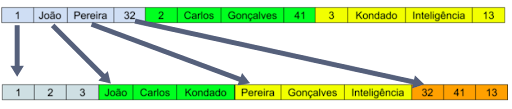


**Vantagens principais para OLAP (Online Analytcal processing):**
- Leituras de muitas linhas e poucas colunas ficam muito mais rápidas
- Compressão por coluna é mais eficiente
- Agregações massivas (SUM, AVG, COUNT, GROUP BY) ficam muito mais rápidas

**Limitação principal:**
- Atualizações linha a linha e workloads muito transacionais não são o foco

### Passo 1: Criar um database colunar

No ClickHouse tudo já é colunar por padrão. Basta criar o database.

In [14]:
client.command('CREATE DATABASE IF NOT EXISTS analytics_db')
print('Banco de dados criado com sucesso!')

Banco de dados criado com sucesso!


### Passo 2: Criar uma tabela fato colunar

Exemplo: tabela de eventos de acesso a um sistema

In [15]:
client.command('''
    CREATE TABLE IF NOT EXISTS analytics_db.eventos_acesso (
        event_time      DateTime,
        user_id         UInt32,
        app_name        LowCardinality(String),
        endpoint        String,
        status_code     UInt16,
        response_time_ms UInt32
    )
    ENGINE = MergeTree()
    PARTITION BY toDate(event_time)
    ORDER BY (app_name, event_time, user_id)
''')
print('Tabela criada com sucesso!')

Tabela criada com sucesso!


### Passo 3: Inserir dados no banco colunar
#### 3.1: Inserção em lote com Python

In [16]:
from datetime import datetime

dados = [
    (datetime(2025, 11, 24, 10, 0, 0), 1, 'meu_app', '/login', 200, 120),
    (datetime(2025, 11, 24, 10, 0, 1), 2, 'meu_app', '/home', 200, 45),
    (datetime(2025, 11, 24, 10, 0, 2), 1, 'meu_app', '/relatorios', 500, 950),
]

client.insert(
    'analytics_db.eventos_acesso',
    dados,
    column_names=[
        'event_time',
        'user_id',
        'app_name',
        'endpoint',
        'status_code',
        'response_time_ms'
    ]
)
print('Dados inseridos com sucesso!')

Dados inseridos com sucesso!


### 3.2. Inserção a partir de um DataFrame Pandas

In [17]:
import pandas as pd

df = pd.DataFrame({
    'event_time': [datetime(2025, 11, 24, 11, 0, 0),
                   datetime(2025, 11, 24, 11, 0, 5)],
    'user_id': [3, 4],
    'app_name': ['meu_app', 'meu_app'],
    'endpoint': ['/login', '/home'],
    'status_code': [200, 200],
    'response_time_ms': [80, 60]
})

client.insert_df('analytics_db.eventos_acesso', df)
print('Dados inseridos com sucesso!')

Dados inseridos com sucesso!


### Passo 4: Consultar dados no banco colunar
Em um banco colunar o armazenamento é organizado por colunas, não por linhas. Isso significa que, ao consultar, o SGBD lê apenas as colunas necessárias para responder ao SELECT.

Consequências diretas:
- Consultas que usam poucos campos são muito rápidas
- Filtros usando colunas do ORDER BY são mais eficientes
- Compression e processamento vetorial aceleram agregações

Em vez de buscar registros linha por linha, o ClickHouse varre blocos de colunas específicos. 

Por isso, a sintaxe de busca é a mesma do SQL tradicional, mas o desempenho é muito melhor.

In [18]:
result = client.query('SELECT * FROM analytics_db.eventos_acesso')

for row in result.result_rows:
    print(row)

(datetime.datetime(2025, 11, 24, 13, 0), 1, 'meu_app', '/login', 200, 120)
(datetime.datetime(2025, 11, 24, 13, 0, 1), 2, 'meu_app', '/home', 200, 45)
(datetime.datetime(2025, 11, 24, 13, 0, 2), 1, 'meu_app', '/relatorios', 500, 950)
(datetime.datetime(2025, 11, 24, 11, 0), 3, 'meu_app', '/login', 200, 80)
(datetime.datetime(2025, 11, 24, 11, 0, 5), 4, 'meu_app', '/home', 200, 60)


In [19]:
result = client.query("SELECT * FROM analytics_db.eventos_acesso WHERE endpoint = '/home'")

for row in result.result_rows:
    print(row)

(datetime.datetime(2025, 11, 24, 13, 0, 1), 2, 'meu_app', '/home', 200, 45)
(datetime.datetime(2025, 11, 24, 11, 0, 5), 4, 'meu_app', '/home', 200, 60)


#### 4.1: Consultas analíticas típicas

- Contar requisições por status e por app:

In [20]:
result = client.query('''
SELECT app_name, status_code, count(*) as total
    FROM analytics_db.eventos_acesso
    GROUP BY app_name, status_code
    ORDER BY total DESC
''')

for row in result.result_rows:
    print(row)

('meu_app', 200, 4)
('meu_app', 500, 1)


#### Cálculo de média de tempo de resposta por endpoint:

In [21]:
result = client.query('''
    SELECT
        endpoint,
        avg(response_time_ms) as avg_response_time
    FROM analytics_db.eventos_acesso
    GROUP BY endpoint
    ORDER BY avg_response_time DESC
''')

In [22]:
result = client.query('''SELECT * FROM analytics_db.eventos_acesso''')

for row in result.result_rows:
    print(row)

(datetime.datetime(2025, 11, 24, 13, 0), 1, 'meu_app', '/login', 200, 120)
(datetime.datetime(2025, 11, 24, 13, 0, 1), 2, 'meu_app', '/home', 200, 45)
(datetime.datetime(2025, 11, 24, 13, 0, 2), 1, 'meu_app', '/relatorios', 500, 950)
(datetime.datetime(2025, 11, 24, 11, 0), 3, 'meu_app', '/login', 200, 80)
(datetime.datetime(2025, 11, 24, 11, 0, 5), 4, 'meu_app', '/home', 200, 60)


### Visualizar como DataFrame Pandas

In [23]:
query = "SELECT * FROM analytics_db.eventos_acesso"
df = client.query_df(query)
df

,event_time,user_id,app_name,endpoint,status_code,response_time_ms
0,2025-11-24 13:00:00,1,meu_app,/login,200,120
1,2025-11-24 13:00:01,2,meu_app,/home,200,45
2,2025-11-24 13:00:02,1,meu_app,/relatorios,500,950
3,2025-11-24 11:00:00,3,meu_app,/login,200,80
4,2025-11-24 11:00:05,4,meu_app,/home,200,60


In [24]:
# Saída bruta em formato Pretty
data = client.raw_query(query=query, fmt='Pretty')

print(data.decode('utf-8'))

   ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
   ┃          event_time ┃ user_id ┃ app_name ┃ endpoint    ┃ status_code ┃ response_time_ms ┃
   ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
1. │ 2025-11-24 11:00:00 │       3 │ meu_app  │ /login      │         200 │               80 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
2. │ 2025-11-24 11:00:05 │       4 │ meu_app  │ /home       │         200 │               60 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
3. │ 2025-11-24 13:00:00 │       1 │ meu_app  │ /login      │         200 │              120 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
4. │ 2025-11-24 13:00:01 │       2 │ meu_app  │ /home       │         200 │               45 │
   ├─────────────────────┼─────────┼──────────┼───

In [26]:
result = client.query("SELECT endpoint FROM analytics_db.eventos_acesso LIMIT 10")

coluna_endpoint = [row[0] for row in result.result_rows]

print(coluna_endpoint)

['/login', '/home', '/relatorios', '/login', '/home']


### Saída bruta em formato Pretty

In [27]:
data = client.raw_query(query=query, fmt='Pretty')
print(data.decode('utf-8'))

   ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
   ┃          event_time ┃ user_id ┃ app_name ┃ endpoint    ┃ status_code ┃ response_time_ms ┃
   ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
1. │ 2025-11-24 11:00:00 │       3 │ meu_app  │ /login      │         200 │               80 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
2. │ 2025-11-24 11:00:05 │       4 │ meu_app  │ /home       │         200 │               60 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
3. │ 2025-11-24 13:00:00 │       1 │ meu_app  │ /login      │         200 │              120 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
4. │ 2025-11-24 13:00:01 │       2 │ meu_app  │ /home       │         200 │               45 │
   ├─────────────────────┼─────────┼──────────┼───

### Formato PrettyCompact (visualização enxuta)

In [28]:
resultado = client.raw_query(query=query, fmt='PrettyCompact')

print(resultado.decode('utf-8'))

   ┌──────────event_time─┬─user_id─┬─app_name─┬─endpoint────┬─status_code─┬─response_time_ms─┐
1. │ 2025-11-24 13:00:00 │       1 │ meu_app  │ /login      │         200 │              120 │
2. │ 2025-11-24 13:00:01 │       2 │ meu_app  │ /home       │         200 │               45 │
3. │ 2025-11-24 13:00:02 │       1 │ meu_app  │ /relatorios │         500 │              950 │
4. │ 2025-11-24 11:00:00 │       3 │ meu_app  │ /login      │         200 │               80 │
5. │ 2025-11-24 11:00:05 │       4 │ meu_app  │ /home       │         200 │               60 │
   └─────────────────────┴─────────┴──────────┴─────────────┴─────────────┴──────────────────┘



### Formato Markdown

Produz tabela estilo Markdown, ideal para Jupyter, GitHub, Docx ou apresentações.

In [29]:
resultado = client.raw_query(query=query, fmt='Markdown')
print(resultado.decode('utf-8'))

| event_time | user_id | app_name | endpoint | status_code | response_time_ms |
|-:|-:|:-|:-|-:|-:|
| 2025-11-24 13:00:00 | 1 | meu_app | /login | 200 | 120 |
| 2025-11-24 13:00:01 | 2 | meu_app | /home | 200 | 45 |
| 2025-11-24 13:00:02 | 1 | meu_app | /relatorios | 500 | 950 |
| 2025-11-24 11:00:00 | 3 | meu_app | /login | 200 | 80 |
| 2025-11-24 11:00:05 | 4 | meu_app | /home | 200 | 60 |



#### Cole o resultado da consulta no Jupyter

### Formato Vertical

Excelente para inspecionar uma única linha de forma detalhada.

In [30]:
result = client.query("""
    SELECT * FROM analytics_db.eventos_acesso
""")

vetor = [row[0] for row in result.result_rows]

print(vetor)

[datetime.datetime(2025, 11, 24, 11, 0), datetime.datetime(2025, 11, 24, 11, 0, 5), datetime.datetime(2025, 11, 24, 13, 0), datetime.datetime(2025, 11, 24, 13, 0, 1), datetime.datetime(2025, 11, 24, 13, 0, 2)]


In [31]:
result = client.query("""
    SELECT event_time, user_id
    FROM analytics_db.eventos_acesso
    LIMIT 10
""")

event_time = [row[0] for row in result.result_rows]
user_id = [row[1] for row in result.result_rows]

print(event_time)
print(user_id)

[datetime.datetime(2025, 11, 24, 13, 0), datetime.datetime(2025, 11, 24, 13, 0, 1), datetime.datetime(2025, 11, 24, 13, 0, 2), datetime.datetime(2025, 11, 24, 11, 0), datetime.datetime(2025, 11, 24, 11, 0, 5)]
[1, 2, 1, 3, 4]


In [32]:
resultado = client.raw_query(query=query, fmt='Vertical')

print(resultado.decode('utf-8'))

Row 1:
──────
event_time:       2025-11-24 11:00:00
user_id:          3
app_name:         meu_app
endpoint:         /login
status_code:      200
response_time_ms: 80

Row 2:
──────
event_time:       2025-11-24 11:00:05
user_id:          4
app_name:         meu_app
endpoint:         /home
status_code:      200
response_time_ms: 60

Row 3:
──────
event_time:       2025-11-24 13:00:00
user_id:          1
app_name:         meu_app
endpoint:         /login
status_code:      200
response_time_ms: 120

Row 4:
──────
event_time:       2025-11-24 13:00:01
user_id:          2
app_name:         meu_app
endpoint:         /home
status_code:      200
response_time_ms: 45

Row 5:
──────
event_time:       2025-11-24 13:00:02
user_id:          1
app_name:         meu_app
endpoint:         /relatorios
status_code:      500
response_time_ms: 950



In [33]:
resultado = client.raw_query(query=query, fmt='CSV')

print(resultado.decode('utf-8'))

"2025-11-24 13:00:00",1,"meu_app","/login",200,120
"2025-11-24 13:00:01",2,"meu_app","/home",200,45
"2025-11-24 13:00:02",1,"meu_app","/relatorios",500,950
"2025-11-24 11:00:00",3,"meu_app","/login",200,80
"2025-11-24 11:00:05",4,"meu_app","/home",200,60



In [34]:
resultado = client.raw_query(query=query, fmt='CSVWithNamesAndTypes')

print(resultado.decode('utf-8'))

"event_time","user_id","app_name","endpoint","status_code","response_time_ms"
"DateTime","UInt32","LowCardinality(String)","String","UInt16","UInt32"
"2025-11-24 13:00:00",1,"meu_app","/login",200,120
"2025-11-24 13:00:01",2,"meu_app","/home",200,45
"2025-11-24 13:00:02",1,"meu_app","/relatorios",500,950
"2025-11-24 11:00:00",3,"meu_app","/login",200,80
"2025-11-24 11:00:05",4,"meu_app","/home",200,60



In [35]:
resultado = client.raw_query(query=query, fmt='TabSeparated')

print(resultado.decode('utf-8'))

2025-11-24 13:00:00	1	meu_app	/login	200	120
2025-11-24 13:00:01	2	meu_app	/home	200	45
2025-11-24 13:00:02	1	meu_app	/relatorios	500	950
2025-11-24 11:00:00	3	meu_app	/login	200	80
2025-11-24 11:00:05	4	meu_app	/home	200	60



In [36]:
resultado = client.raw_query(query=query, fmt='JSON')

print(resultado.decode('utf-8'))

{
	"meta":
	[
		{
			"name": "event_time",
			"type": "DateTime"
		},
		{
			"name": "user_id",
			"type": "UInt32"
		},
		{
			"name": "app_name",
			"type": "LowCardinality(String)"
		},
		{
			"name": "endpoint",
			"type": "String"
		},
		{
			"name": "status_code",
			"type": "UInt16"
		},
		{
			"name": "response_time_ms",
			"type": "UInt32"
		}
	],

	"data":
	[
		{
			"event_time": "2025-11-24 13:00:00",
			"user_id": 1,
			"app_name": "meu_app",
			"endpoint": "\/login",
			"status_code": 200,
			"response_time_ms": 120
		},
		{
			"event_time": "2025-11-24 13:00:01",
			"user_id": 2,
			"app_name": "meu_app",
			"endpoint": "\/home",
			"status_code": 200,
			"response_time_ms": 45
		},
		{
			"event_time": "2025-11-24 13:00:02",
			"user_id": 1,
			"app_name": "meu_app",
			"endpoint": "\/relatorios",
			"status_code": 500,
			"response_time_ms": 950
		},
		{
			"event_time": "2025-11-24 11:00:00",
			"user_id": 3,
			"app_name": "meu_app",
			"endpoint": "\/login",
			"stat

In [37]:
resultado = client.raw_query(query=query, fmt='JSONCompact')

print(resultado.decode('utf-8'))

{
	"meta":
	[
		{
			"name": "event_time",
			"type": "DateTime"
		},
		{
			"name": "user_id",
			"type": "UInt32"
		},
		{
			"name": "app_name",
			"type": "LowCardinality(String)"
		},
		{
			"name": "endpoint",
			"type": "String"
		},
		{
			"name": "status_code",
			"type": "UInt16"
		},
		{
			"name": "response_time_ms",
			"type": "UInt32"
		}
	],

	"data":
	[
		["2025-11-24 13:00:00", 1, "meu_app", "\/login", 200, 120],
		["2025-11-24 13:00:01", 2, "meu_app", "\/home", 200, 45],
		["2025-11-24 13:00:02", 1, "meu_app", "\/relatorios", 500, 950],
		["2025-11-24 11:00:00", 3, "meu_app", "\/login", 200, 80],
		["2025-11-24 11:00:05", 4, "meu_app", "\/home", 200, 60]
	],

	"rows": 5,

	"statistics":
	{
		"elapsed": 0.002387412,
		"rows_read": 5,
		"bytes_read": 194
	}
}



In [38]:
resultado = client.raw_query(query=query, fmt='XML')
#print(resultado)
print(resultado.decode('utf-8'))

<?xml version='1.0' encoding='UTF-8' ?>
<result>
	<meta>
		<columns>
			<column>
				<name>event_time</name>
				<type>DateTime</type>
			</column>
			<column>
				<name>user_id</name>
				<type>UInt32</type>
			</column>
			<column>
				<name>app_name</name>
				<type>LowCardinality(String)</type>
			</column>
			<column>
				<name>endpoint</name>
				<type>String</type>
			</column>
			<column>
				<name>status_code</name>
				<type>UInt16</type>
			</column>
			<column>
				<name>response_time_ms</name>
				<type>UInt32</type>
			</column>
		</columns>
	</meta>
	<data>
		<row>
			<event_time>2025-11-24 13:00:00</event_time>
			<user_id>1</user_id>
			<app_name>meu_app</app_name>
			<endpoint>/login</endpoint>
			<status_code>200</status_code>
			<response_time_ms>120</response_time_ms>
		</row>
		<row>
			<event_time>2025-11-24 13:00:01</event_time>
			<user_id>2</user_id>
			<app_name>meu_app</app_name>
			<endpoint>/home</endpoint>
			<status_code>200</status_code>
			<response_ti

In [39]:
resultado = client.raw_query(query=query, fmt='SQLInsert')
#print(resultado)
print(resultado.decode('utf-8'))

INSERT INTO table (`event_time`, `user_id`, `app_name`, `endpoint`, `status_code`, `response_time_ms`) VALUES ('2025-11-24 13:00:00', 1, 'meu_app', '/login', 200, 120), ('2025-11-24 13:00:01', 2, 'meu_app', '/home', 200, 45), ('2025-11-24 13:00:02', 1, 'meu_app', '/relatorios', 500, 950), ('2025-11-24 11:00:00', 3, 'meu_app', '/login', 200, 80), ('2025-11-24 11:00:05', 4, 'meu_app', '/home', 200, 60);



In [40]:
resultado = client.raw_query(query=query, fmt='PrettyNoEscapes')
#print(resultado)
print(resultado.decode('utf-8'))

   ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
   ┃          event_time ┃ user_id ┃ app_name ┃ endpoint    ┃ status_code ┃ response_time_ms ┃
   ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
1. │ 2025-11-24 13:00:00 │       1 │ meu_app  │ /login      │         200 │              120 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
2. │ 2025-11-24 13:00:01 │       2 │ meu_app  │ /home       │         200 │               45 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
3. │ 2025-11-24 13:00:02 │       1 │ meu_app  │ /relatorios │         500 │              950 │
   ├─────────────────────┼─────────┼──────────┼─────────────┼─────────────┼──────────────────┤
4. │ 2025-11-24 11:00:00 │       3 │ meu_app  │ /login      │         200 │               80 │
   ├─────────────────────┼─────────┼──────────┼───

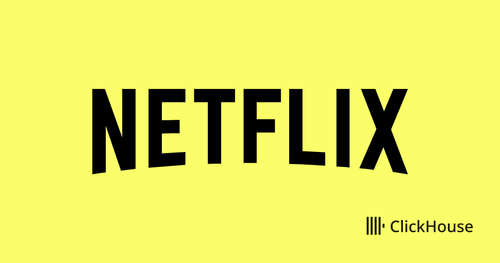

### Passo 1: Cenário

#### Queremos um sistema de catálogo de filmes, como o Netflix, mas com imagens para reduzir o tamanho do banco.

Nosso banco deve ter:
- Catálogo de imagens
- Metadados das imagens
- Histórico de uso pelos usuários
- Consultas analíticas
    - quais imagens são mais vistas
    - quais categorias têm maior engajamento
    - perfis de consumo por usuário, país, dispositivo

O ClickHouse será usado como banco colunar para:

- Tabela de catálogo de imagens
- Tabela de usuários
- Tabela de eventos de interação

As imagens em si ficam no storage, e o banco guarda o campo `storage_url` ou `storage_path`.

### Passo 2. Modelo conceitual colunar
####  2.1 Entidade Imagem

Atributos típicos:
- image_id
- title
- description
- category, por exemplo natureza, esportes
- tags, lista de palavras chave
- storage_url, local do arquivo
- resolution_width, resolution_height
- size_bytes
- upload_time
- age_rating, classificação etária

#### 2.2 Entidade Usuário

- user_id
- name
- country
- signup_date

Para analytics, não precisamos de todos os dados pessoais, apenas o mínimo necessário.

#### 2.3 Entidade Evento de Uso

- event_time
- user_id
- image_id
- event_type, por exemplo view, like, share
- device_type
- country
- session_id

Essa tabela será a maior, típica tabela fato, e é onde o banco colunar brilha.

### Passo 3: Conexão com ClickHouse

In [ ]:
import clickhouse_connect

client = clickhouse_connect.get_client(
    host='atividade15kayque.eastus2.aws.clickhouse.cloud',  
    port=8443,
    username='default',
    password='JMza9i~m4jUQN',
    secure=True
)

#### 4 Criar o Banco de dados

In [42]:
client.command("CREATE DATABASE IF NOT EXISTS media_db")

# Conferir se o banco foi criado
dbs = client.query("SHOW DATABASES")
print("Databases existentes:")
for row in dbs.result_rows:
    print("-", row[0])

Databases existentes:
- INFORMATION_SCHEMA
- analytics_db
- banco_sua_turma
- default
- demo_db
- information_schema
- media_db
- system


### Passo 5: Criar tabelas colunares

Nesta etapa, vamos criar três tabelas com `ENGINE = MergeTree`, que é colunar por padrão no ClickHouse.

#### 5.1 Tabela de catálogo de imagens
`media_db.images`  
- Metadados das imagens, por exemplo título, categoria, resolução, tamanho, url de storage.

In [43]:
client.command("""
    CREATE TABLE IF NOT EXISTS media_db.images (
        image_id          UUID,
        title             String,
        description       String,
        category          LowCardinality(String),
        tags              Array(String),
        storage_url       String,
        resolution_width  UInt16,
        resolution_height UInt16,
        size_bytes        UInt32,
        upload_time       DateTime,
        age_rating        LowCardinality(String),
        is_active         UInt8
    )
    ENGINE = MergeTree()
    PARTITION BY toYYYYMM(upload_time)
    ORDER BY (category, upload_time, image_id)
""")
print("Tabela criada com sucesso!")

Tabela criada com sucesso!


#### 5.3 Tabela de usuários
`media_db.users`  
- Usuários, com país e data de cadastro.  

In [44]:
client.command("""
    CREATE TABLE IF NOT EXISTS media_db.users (
        user_id      UInt64,
        name         String,
        country      LowCardinality(String),
        signup_date  Date
    )
    ENGINE = MergeTree()
    ORDER BY (country, signup_date, user_id)
""")
print("Tabela criada com sucesso!")

Tabela criada com sucesso!


#### 5.4 Tabela de eventos de uso
`media_db.image_events`  
- Eventos de uso, por exemplo view, like, share, com data e contexto (dispositivo, país, sessão).

Essa é a tabela principal para analytics.

In [45]:
client.command("""
    CREATE TABLE IF NOT EXISTS media_db.image_events (
        event_time   DateTime,
        user_id      UInt64,
        image_id     UUID,
        event_type   Enum8('view' = 1, 'like' = 2, 'share' = 3),
        device_type  LowCardinality(String),
        country      LowCardinality(String),
        session_id   String
    )
    ENGINE = MergeTree()
    PARTITION BY toDate(event_time)
    ORDER BY (image_id, event_time, user_id)
""")
print("Tabela criada com sucesso!")

Tabela criada com sucesso!


### Passo 6 Inserir alguns dados de exemplo

Vamos inserir:

1. Algumas imagens na tabela `media_db.images`.  
2. Alguns usuários na tabela `media_db.users`.  
3. Alguns eventos de uso na tabela `media_db.image_events`.

As imagens reais estariam em um storage de objetos, por exemplo S3. Aqui vamos simular com paths como `s3://bucket/imagens/...`.

In [46]:
from datetime import datetime
import uuid

# Inserir imagens
images_data = [
    (uuid.uuid4(), 'Pôr do Sol na Praia', 'Imagem de um pôr do sol', 'natureza',
     ['por_do_sol', 'praia', 'mar'],
     's3://bucket/imagens/sunset1.jpg', 1920, 1080, 350000, datetime(2025, 1, 10, 18, 0, 0), 'Livre', 1),
    (uuid.uuid4(), 'Estádio de Futebol', 'Imagem de um estádio lotado', 'esportes',
     ['futebol', 'estadio', 'noite'],
     's3://bucket/imagens/stadium1.jpg', 1920, 1080, 420000, datetime(2025, 1, 12, 20, 30, 0), '10+', 1)
]

client.insert(
    'media_db.images',
    images_data,
    column_names=[
        'image_id', 'title', 'description', 'category', 'tags',
        'storage_url', 'resolution_width', 'resolution_height',
        'size_bytes', 'upload_time', 'age_rating', 'is_active'
    ]
)
print("Imagens inseridos.")

Imagens inseridos.


In [47]:
# Inserir usuários
users_data = [
    (1, 'Ana', 'BR', datetime(2024, 5, 1).date()),
    (2, 'Bruno', 'US', datetime(2024, 6, 15).date())
]

client.insert(
    'media_db.users',
    users_data,
    column_names=['user_id', 'name', 'country', 'signup_date']
)
print("Usuários inseridos.")

Usuários inseridos.


In [48]:
# Inserir eventos
events_data = [
    (datetime(2025, 1, 15, 21, 0, 0), 1, images_data[0][0], 'view', 'mobile', 'BR', 'sessao_001'),
    (datetime(2025, 1, 15, 21, 0, 5), 1, images_data[0][0], 'like', 'mobile', 'BR', 'sessao_001'),
    (datetime(2025, 1, 15, 21, 5, 0), 2, images_data[1][0], 'view', 'tv', 'US', 'sessao_002')
]

client.insert(
    'media_db.image_events',
    events_data,
    column_names=[
        'event_time', 'user_id', 'image_id',
        'event_type', 'device_type', 'country', 'session_id'
    ]
)
print("Eventos inseridos.")

Eventos inseridos.


#### Vamos conferir o conteúdo das tabelas:

1. Listar todas as imagens.  
2. Listar todos os usuários.  
3. Listar todos os eventos.

In [49]:
result_images = client.query("SELECT * FROM media_db.images")
print("Imagens:")
for row in result_images.result_rows:
    print(row)

print("\nUsuários:")
result_users = client.query("SELECT * FROM media_db.users")
for row in result_users.result_rows:
    print(row)

print("\nEventos:")
result_events = client.query("SELECT * FROM media_db.image_events")
for row in result_events.result_rows:
    print(row)

Imagens:
(UUID('405191a7-694f-4165-8180-4dddef803931'), 'Estádio de Futebol', 'Imagem de um estádio lotado', 'esportes', ['futebol', 'estadio', 'noite'], 's3://bucket/imagens/stadium1.jpg', 1920, 1080, 420000, datetime.datetime(2025, 1, 12, 23, 30), '10+', 1)
(UUID('2580535a-1afb-4586-bdba-a32fd68a53b2'), 'Pôr do Sol na Praia', 'Imagem de um pôr do sol', 'natureza', ['por_do_sol', 'praia', 'mar'], 's3://bucket/imagens/sunset1.jpg', 1920, 1080, 350000, datetime.datetime(2025, 1, 10, 21, 0), 'Livre', 1)
(UUID('a9070652-2bd1-497c-a16d-6119257af337'), 'Estádio de Futebol', 'Imagem de um estádio lotado', 'esportes', ['futebol', 'estadio', 'noite'], 's3://bucket/imagens/stadium1.jpg', 1920, 1080, 420000, datetime.datetime(2025, 1, 12, 23, 30), '10+', 1)
(UUID('30a3109c-b39e-42c3-a5a0-20f72c914aa8'), 'Pôr do Sol na Praia', 'Imagem de um pôr do sol', 'natureza', ['por_do_sol', 'praia', 'mar'], 's3://bucket/imagens/sunset1.jpg', 1920, 1080, 350000, datetime.datetime(2025, 1, 10, 21, 0), 'Livre'

### Passo 7: Consultas analíticas típicas


#### 7.1 Imagens mais vistas, tipo top N

In [50]:
top_views = client.query("""
    SELECT
        e.image_id,
        i.title,
        i.category,
        countIf(e.event_type = 'view') AS views
    FROM media_db.image_events e
    INNER JOIN media_db.images i
        ON e.image_id = i.image_id
    GROUP BY e.image_id, i.title, i.category
    ORDER BY views DESC
    LIMIT 10
""")

print("Imagens mais vistas:")
for row in top_views.result_rows:
    print(row)

Imagens mais vistas:
(UUID('405191a7-694f-4165-8180-4dddef803931'), 'Estádio de Futebol', 'esportes', 1)
(UUID('30a3109c-b39e-42c3-a5a0-20f72c914aa8'), 'Pôr do Sol na Praia', 'natureza', 1)
(UUID('2580535a-1afb-4586-bdba-a32fd68a53b2'), 'Pôr do Sol na Praia', 'natureza', 1)
(UUID('a9070652-2bd1-497c-a16d-6119257af337'), 'Estádio de Futebol', 'esportes', 1)


#### 6.2 Engajamento por categoria

In [51]:
engajamento_categoria = client.query("""
    SELECT
        i.category,
        countIf(e.event_type = 'view')  AS total_views,
        countIf(e.event_type = 'like')  AS total_likes,
        countIf(e.event_type = 'share') AS total_shares
    FROM media_db.image_events e
    INNER JOIN media_db.images i
        ON e.image_id = i.image_id
    GROUP BY i.category
    ORDER BY total_views DESC
""")

print("Engajamento por categoria:")
for row in engajamento_categoria.result_rows:
    print(row)

Engajamento por categoria:
('esportes', 2, 0, 0)
('natureza', 2, 2, 0)


#### 6.3 Comportamento por país e dispositivo

In [52]:
consumo_pais_dispositivo = client.query("""
    SELECT
        e.country,
        e.device_type,
        countIf(e.event_type = 'view') AS views
    FROM media_db.image_events e
    GROUP BY e.country, e.device_type
    ORDER BY views DESC
""")

print("Consumo por país e dispositivo:")
for row in consumo_pais_dispositivo.result_rows:
    print(row)

Consumo por país e dispositivo:
('US', 'tv', 2)
('BR', 'mobile', 2)


### Ver em Pandas

In [54]:
import pandas as pd

df_top_views = client.query_df("""
    SELECT
        e.image_id,
        i.title,
        i.category,
        countIf(e.event_type = 'view') AS views
    FROM media_db.image_events e
    INNER JOIN media_db.images i
        ON e.image_id = i.image_id
    GROUP BY e.image_id, i.title, i.category
    ORDER BY views DESC
    LIMIT 10
""")

df_top_views

,image_id,title,category,views
0,405191a7-694f-4165-8180-4dddef803931,Estádio de Futebol,esportes,1
1,30a3109c-b39e-42c3-a5a0-20f72c914aa8,Pôr do Sol na Praia,natureza,1
2,2580535a-1afb-4586-bdba-a32fd68a53b2,Pôr do Sol na Praia,natureza,1
3,a9070652-2bd1-497c-a16d-6119257af337,Estádio de Futebol,esportes,1


### Ver Schema

In [55]:
result = client.query("""
    SELECT 
        name,
        type,
        default_expression,
        comment
    FROM system.columns
    WHERE database = 'media_db'
      AND table = 'images'
    ORDER BY position
""")

for row in result.result_rows:
    print(row)

('image_id', 'UUID', '', '')
('title', 'String', '', '')
('description', 'String', '', '')
('category', 'LowCardinality(String)', '', '')
('tags', 'Array(String)', '', '')
('storage_url', 'String', '', '')
('resolution_width', 'UInt16', '', '')
('resolution_height', 'UInt16', '', '')
('size_bytes', 'UInt32', '', '')
('upload_time', 'DateTime', '', '')
('age_rating', 'LowCardinality(String)', '', '')
('is_active', 'UInt8', '', '')


# Exercício: Analytics com Banco de Dados Colunar para Manufatura Inteligente

Neste exercício você usará ClickHouse como banco colunar em um cenário de **monitoramento de máquinas industriais**.

Você trabalhará com três tabelas:

1. **machines** – cadastro das máquinas  
2. **sensor_readings** – leituras contínuas de sensores  
3. **machine_events** – eventos operacionais  

O objetivo é explorar o banco, consultar o schema, entender a estrutura e responder a perguntas analíticas.

Você deve rodar cada célula de código no Jupyter e preencher as respostas solicitadas.


In [ ]:
import clickhouse_connect

client = clickhouse_connect.get_client(
    host='atividade15kayque.eastus2.aws.clickhouse.cloud',  
    port=8443,
    username='default',
    password='JMza9i~m4jUQN',
    secure=True
)
print("Conectado ao ClickHouse:", client.query("SELECT version()").result_rows[0][0])

Conectado ao ClickHouse: 25.8.1.8702


# Passo 1. Criar o Database

In [58]:
client.command("CREATE DATABASE IF NOT EXISTS factory_db")

# Passo 2. Criar Tabela: machines

Armazena informações estáticas de cada máquina.

In [59]:
client.command("""
    CREATE TABLE IF NOT EXISTS factory_db.machines (
        machine_id         UInt32,
        name               String,
        model              LowCardinality(String),
        sector             LowCardinality(String),
        install_date       Date,
        power_rating_kw    Float32
    )
    ENGINE = MergeTree()
    ORDER BY (sector, machine_id)
""")

# Passo 3. Criar Tabela: sensor_readings

Tabela de alta frequência com leituras contínuas de sensores.

In [60]:
client.command("""
    CREATE TABLE IF NOT EXISTS factory_db.sensor_readings (
        timestamp          DateTime,
        machine_id         UInt32,
        temperature_c      Float32,
        vibration_mm_s     Float32,
        energy_kw          Float32
    )
    ENGINE = MergeTree()
    PARTITION BY toDate(timestamp)
    ORDER BY (machine_id, timestamp)
""")


# Passo 4. Criar Tabela: machine_events

Registra eventos importantes.

In [61]:
client.command("""
    CREATE TABLE IF NOT EXISTS factory_db.machine_events (
        event_time     DateTime,
        machine_id     UInt32,
        event_type     Enum8('start'=1, 'stop'=2, 'fault'=3, 'maintenance'=4),
        description    String
    )
    ENGINE = MergeTree()
    PARTITION BY toDate(event_time)
    ORDER BY (machine_id, event_time)
""")


# Passo 5. Inserir Dados de Exemplo

In [62]:
from datetime import datetime, date

# Máquinas
machines = [
    (1, "Prensa Hidráulica", "PHX-300", "Estamparia", date(2022, 5, 1), 45.5),
    (2, "Torno CNC", "TCN-200", "Usinagem", date(2023, 1, 12), 18.0),
]

client.insert(
    "factory_db.machines",
    machines,
    column_names=["machine_id", "name", "model", "sector", "install_date", "power_rating_kw"]
)

# Leituras de sensores
sensor_data = [
    (datetime(2025, 1, 10, 8, 0, 0), 1, 65.2, 1.2, 40.5),
    (datetime(2025, 1, 10, 8, 0, 0), 2, 58.0, 0.8, 12.3),
    (datetime(2025, 1, 10, 8, 5, 0), 1, 70.1, 1.4, 42.0),
    (datetime(2025, 1, 10, 8, 5, 0), 2, 57.5, 0.9, 12.1),
]

client.insert(
    "factory_db.sensor_readings",
    sensor_data,
    column_names=["timestamp", "machine_id", "temperature_c", "vibration_mm_s", "energy_kw"]
)

# Eventos
events_data = [
    (datetime(2025, 1, 10, 7, 50, 0), 1, "start", "Início da operação"),
    (datetime(2025, 1, 10, 8, 2, 0), 1, "fault", "Temperatura acima do limite"),
    (datetime(2025, 1, 10, 8, 10, 0), 2, "maintenance", "Lubrificação programada"),
]

client.insert(
    "factory_db.machine_events",
    events_data,
    column_names=["event_time", "machine_id", "event_type", "description"]
)

print("Dados inseridos com sucesso.")

Dados inseridos com sucesso.


# Exercício 1 — Consultar o schema das tabelas

1. Use `DESCRIBE TABLE factory_db.sensor_readings`.
2. Use `system.columns` para ver tipos e posições.

**Perguntas:**
- Quantas colunas há na tabela `sensor_readings`?
- Quais sensores estão sendo monitorados?

# Exercício 2 — Consultas Simples

1. Liste todas as máquinas cadastradas.
2. Liste todas as leituras de sensores ocorridas às 08:00:00.

**Perguntas:**
- Qual máquina apresentou a maior temperatura nesse horário?

# Exercício 3 — Análise de Eventos

1. Liste todos os eventos em ordem cronológica.
2. Filtre apenas eventos do tipo `fault`.

**Perguntas:**
- Qual máquina apresentou falha?
- Em qual horário?

# Exercício 4 — Agregações

1. Conte quantos eventos existem por tipo.
2. Calcule a temperatura média por máquina.
3. Calcule a energia total consumida por cada máquina.

**Perguntas:**
- Qual tipo de evento é mais frequente?
- Qual máquina consome mais energia?

# Exercício 5 — Cruzando Dados

1. Liste a temperatura média das máquinas junto com o setor correspondente.

Dica: JOIN entre:
- `sensor_readings`  
- `machines`

# Exercício 6 — Formatos Especiais (Pretty, Markdown)

Use:

```python
print(client.raw_query(
    query="SELECT * FROM factory_db.machine_events",
    fmt="PrettyCompact"
).decode("utf-8"))